<a href="https://colab.research.google.com/github/DrMarc/slab/blob/master/slab_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Slab tutorial

Welcome to a short demonstration of **slab** ('es-lab', or sound laboratory), a Python package that makes working with sounds and running psychoacoustic experiments simple, efficient, and fun!

In [1]:
get_ipython().__class__.__module__

'google.colab._shell'

Let's install slab with pip. We have to do two things to make this work in a notebook: 1) uninstall the SoundCard module (used to play sounds when you run slab locally on your computer), and 2) set the in_notebook variable to True (see below).

Note: You have to confirm the uninstall of SoundCard by clicking just to the right of `Proceed (Y/n)?` when it appears below and then pressing Enter or the 'y' key.

In [2]:
!pip install slab
!pip uninstall SoundCard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.6/738.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.1 MB/s eta 0:00:00
Found existing installation: SoundCard 0.4.2
Uninstalling SoundCard-0.4.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/SoundCard-0.4.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/soundcard/*
Proceed (Y/n)? 
  Successfully uninstalled SoundCard-0.4.2


You should now have a working installation of slab. Let's import it and print the version string to check that everything went well. We also set the _in_notebook variable to True so that sounds are played correctly (via IPython) and an interactive play button is shown. This is not necessary when you run slab locally.

In [3]:
import slab
print(slab.__version__)
slab.sound._in_notebook=True

1.1.3


As a second check, we'll generate a sound consisting of many sine waves. Plot it's spectrum and waveform, and play it (calling the play method produces an IPython audio player element in notebooks):

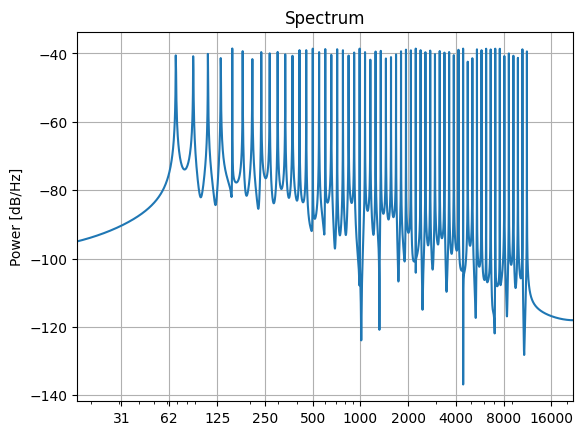

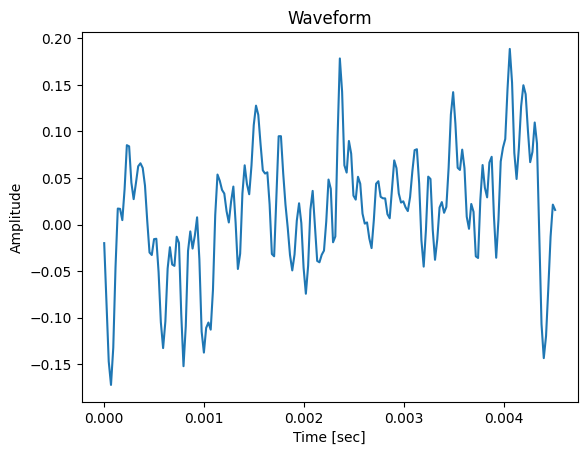

In [4]:
slab.set_default_samplerate(44100)
sig = slab.Sound.multitone_masker(duration=3., low_cutoff=50, high_cutoff=12000, bandwidth=1/9)
sig.spectrum()
sig.waveform(end=200)
sig.play()

The function `slab.Sound.multitone_masker` above is an example of the many functions to generate and manipulate experimental stimuli.

# A stimulus from an actual experiment
Let's look at an actual example from the psychoacoustic literature. Viemeister (1979, **JASA** 66(5), 1364–80) measured modulation transfer functions, i.e. the detectability of amplitude modulation dependent on the modulation frequency, by presenting a 1-sec long pink noise with an average level of 77dB. The amplitude of this noise was then modulated sinusoidally with frequencies between 2 anf 4000 Hz.

We use the `slab.Sound.pinknoise` method to generate a pink noise, set the level to 77 dB and add 5 ms onset and offset ramps to avoid click artifacts, and then play the sound:

In [5]:
base_stimulus = slab.Sound.pinknoise(duration=1.)
base_stimulus.level = 77
base_stimulus = base_stimulus.ramp(duration=0.005)
base_stimulus.play()

Pink noise decreases in amplitude with increasing frequency such that the sound energy per octave is constant. You can see this decrease in the spectrum:

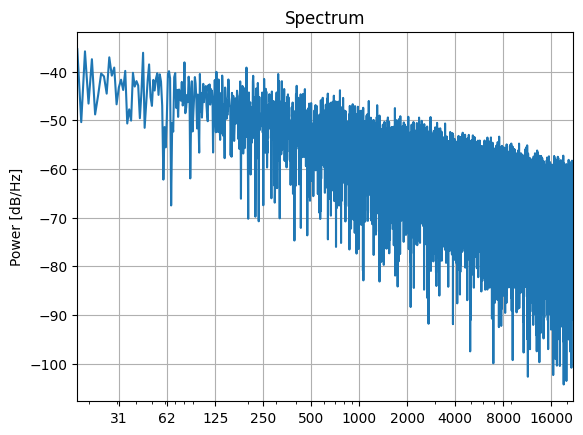

In [6]:
base_stimulus.spectrum()

The ramp should be visible in the waveform. Lets plot the first 5 ms:

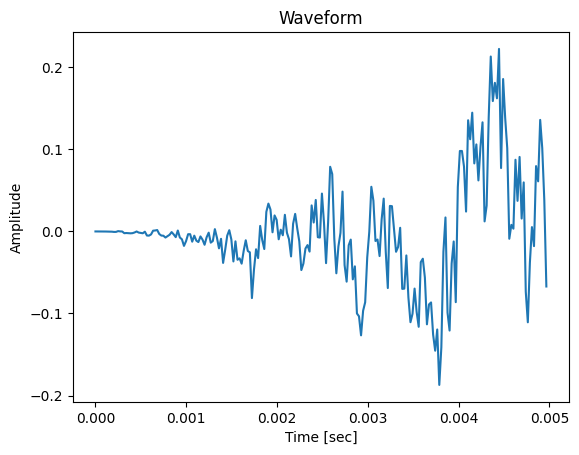

In [7]:
base_stimulus.waveform(end=0.005)

The waveform should start with an amplitude of zero and then slowly ramp up. You can check the offset of the waveform (using the `start` and `end` parameters).

We can also check that the sound has the correct duration and expected number of samples. One way to get information about a sound object by just printing it, which will list most of its properties:

In [8]:
print(base_stimulus)

<class 'slab.sound.Sound'> duration 1.0, samples 44100, channels 1,samplerate 44100


We can now add the amplitude modulation using the `am` method, for instance at 10 Hz, which yields a sort of helicopter noise:

In [9]:
mod_10hz = base_stimulus.am(frequency=10, depth=0.5)
mod_10hz.play()

In the experiment, we would vary the modulation depth in an adaptive staircase to find the depth that can just be noticed. Slab's `Staircase` class geneates staircase objects that return the correct stimulus parameter (for instance modulation depth) when used in a loop. Here is an example of a starcase object (`stairs`) that starts at a stimulus value of 10 and adjusts that value up or down (initially in steps of 4 to quickly get in the neighbourhood of the threshold):

In [10]:
stairs = slab.Staircase(start_val=10, n_reversals=18, step_sizes=[4,1])

 We can iterate of this object in a for loop to get a new stimulus value each time, depending on the listeners previous response, here simulated with the `simulate_response` method of the stairs object. Addint the response to the staircase calculates the next stimulus value and advances the staircase. `add_respinse` **must** be called on each iteration:

In [11]:
for stimulus_value in stairs:
    response = stairs.simulate_response(threshold=3) # simulate subject's response
    stairs.add_response(response) # initiates calculation of next stimulus value

 Finally, we plot the responses as function of the trial number and return the threshold:

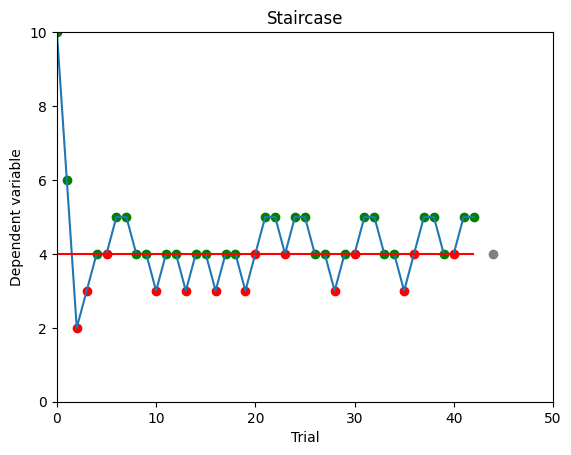

4.0

In [12]:
stairs.plot()
stairs.threshold()

When running an actual experiment, you can call the plot function in the loop, after adding the response. This will update the plot each trial and provide a good feedback of how the listener performance to the experimenter.

